Alex McGraw, Eliesha Lai, Jocelyne Walker, Katelyn Vincent, Mauricio Morales, Shruti Kolhatkar

## Part 1
# Find predictors of influence using  kaggle data

In [ ]:
import io
import os 
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from google.colab import files
uploaded = files.upload()

Saving query_gamestop GME gme AMC.csv to query_gamestop GME gme AMC.csv
Saving train.csv to train (1).csv
Saving edges_output_all_data.csv to edges_output_all_data (2).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = pd.read_csv('train.csv')
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


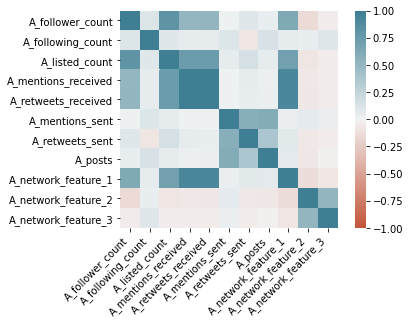

In [ ]:
# test the correlation to identify collinearity in variables
a = data.iloc[:,1:12]
corr = a.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr


,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
A_follower_count,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082
A_following_count,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762
A_listed_count,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574
A_mentions_received,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079
A_retweets_received,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301
A_mentions_sent,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437
A_retweets_sent,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127
A_posts,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347
A_network_feature_1,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711
A_network_feature_2,-0.153272,0.043642,-0.080056,-0.062407,-0.065266,0.064242,-0.048761,-0.066125,-0.118138,1.000000,0.520617


In [ ]:
# drop mentions_received and network_feature, keep retweets_received. Mentions_received and network_feature are highly correlated
# with other predictors based on the correlation matrix above. 
df = data.drop(['A_mentions_received','A_network_feature_1','B_mentions_received','B_network_feature_1'],axis = 1)

In [ ]:
df.iloc[:,1:10]

,A_follower_count,A_following_count,A_listed_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3
0,228,302,3,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000
1,21591,1179,228,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048
2,7310,1215,101,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907
3,20,7,2,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667
4,45589,862,2641,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943
...,...,...,...,...,...,...,...,...,...
5495,41765,185,1356,282.858500,76.809514,5.392171,104.438625,50.132042,3585.789866
5496,112,243,5,0.100503,0.100503,0.100503,0.603177,96.600000,1414.200000
5497,15385,673,747,22.321945,6.946233,0.341936,6.503977,152.495098,3286.617647
5498,265258,209,551,457.648550,5.460985,0.100503,7.498126,3.826314,506.692136


In [ ]:
df.iloc[:,10:19]

,B_follower_count,B_following_count,B_listed_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,34463,29808,1689,3.984029,8.204331,0.332423,6.988815,75.530303,1916.893939
1,39262,848,1610,8.943607,3.227677,0.564343,1.070321,132.030675,2931.515337
2,3622,482,206,0.354379,0.603202,0.100503,0.603202,10.333333,277.333333
3,19562,17637,278,390.293681,27.552040,7.167557,32.101906,23.469296,1395.845634
4,7554,1711,181,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...
5495,804394,1370,15143,5013.642295,22.683131,2.385538,18.420981,21.324988,1413.825398
5496,794,479,8,0.306073,0.100503,0.100503,1.621981,49.000000,4969.000000
5497,7554,1711,181,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
5498,322682,37601,22232,42.330221,6.849227,1.345073,4.359865,234.338068,7168.464489


In [ ]:
# test A-B, the best. Creating features that capture the differences between Person A and Person B's stats
x = pd.DataFrame(df.iloc[:,1:10].values - df.iloc[:,10:19].values)
x.columns = ['A/B_follower_count','A/B_following_count','A/B_listed_count','A/B_retweets_received','A/B_mentions_sent',
              'A/B_retweets_sent','A/B_posts','A/B_network_feature_2','A/B_network_feature_3']
y= data['Choice']
x.isnull().values.any()

False

In [ ]:
# split data into train and test, with 30% of data used for testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [ ]:
# logistic regression modeling which person (A or B) is the influencer
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.576259
         Iterations 7
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.168      
Dependent Variable:   Choice           AIC:              4455.1941  
Date:                 2021-02-08 00:25 BIC:              4511.4965  
No. Observations:     3850             Log-Likelihood:   -2218.6    
Df Model:             8                LL-Null:          -2667.0    
Df Residuals:         3841             LLR p-value:      2.7945e-188
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
A/B_follower_count    -0.0000   0.0000 -1.5098 0.1311 -0.0000 0.0000
A/B_following_count    0.000

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.feature_selection import RFE

clf = LogisticRegression()
clf = RFE(clf, 5)
clf.fit(x_train,y_train)
print(clf.support_)
print(clf.ranking_)

y_pred = clf.predict(x_test)
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

confusion_matrix(y_test, y_pred)

# Logistic Regression model results in about 74.36% testing accuracy 

[False False  True False  True  True  True  True False]
[5 4 1 3 1 1 1 1 2]
Training Accuracy : 0.7350649350649351
Testing Accuracy : 0.7436363636363637


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[595, 234],
       [189, 632]])

In [ ]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       829
           1       0.73      0.77      0.75       821

    accuracy                           0.74      1650
   macro avg       0.74      0.74      0.74      1650
weighted avg       0.74      0.74      0.74      1650



0.743762571461735

In [ ]:
# Improving upon our Logistic Regression Model 
# select out the five important feature in logistic regression

cols = ['A/B_listed_count','A/B_mentions_sent','A/B_retweets_sent','A/B_posts','A/B_network_feature_2']
x_train2=x_train[cols]
x_test2=x_test[cols]

logit_model=sm.Logit(y_train,x_train2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.580835
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.162      
Dependent Variable: Choice           AIC:              4482.4268  
Date:               2021-02-08 00:26 BIC:              4513.7059  
No. Observations:   3850             Log-Likelihood:   -2236.2    
Df Model:           4                LL-Null:          -2667.0    
Df Residuals:       3845             LLR p-value:      3.5687e-185
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
------------------------------------------------------------------
A/B_listed_count      0.0001   0.0000 19.0386 0.0000 0.0001 0.0001
A/B_mentions_sent     0.0103   0.0040  2.5988 0.0094 

The most important features for determining influence according to Logistic Regression are:


*   Difference in retweets sent
*   Difference in mentions sent
*   Difference in posts
*  Difference in network feature 2 (assumed to be betweenness) 
*  Difference in listed count



**Confusion matrix of best model (using Logistic Regression) is shown below:**

In [ ]:
clf = LogisticRegression()
clf.fit(x_train2,y_train)

y_pred = clf.predict(x_test2)
print("Training Accuracy :", clf.score(x_train2, y_train))
print("Testing Accuracy :", clf.score(x_test2, y_test))

confusion_matrix(y_test, y_pred)

# With just the first 5 features, we stay at about 74.36% testing accuracy

Training Accuracy : 0.7350649350649351
Testing Accuracy : 0.7436363636363637


array([[595, 234],
       [189, 632]])

In [ ]:
# Attempting other classification models 
# Random forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

confusion_matrix(y_test, y_pred)

# Random Forest performs better with 76.97% testing accuracy

Training Accuracy : 0.9937662337662337
Testing Accuracy : 0.7696969696969697


array([[619, 210],
       [170, 651]])

In [ ]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       829
           1       0.76      0.79      0.77       821

    accuracy                           0.77      1650
   macro avg       0.77      0.77      0.77      1650
weighted avg       0.77      0.77      0.77      1650



0.7698090974406745

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

# The most important features in the model are A-B's listed_count and follower_count

,importance
A/B_listed_count,0.221703
A/B_follower_count,0.169755
A/B_retweets_received,0.142580
A/B_mentions_sent,0.082307
A/B_network_feature_2,0.082045
A/B_posts,0.081357
A/B_network_feature_3,0.077641
A/B_following_count,0.076845
A/B_retweets_sent,0.065767


In [ ]:
# Attempting to improve model by reducing number of features
# select features with importance score larger than 0.08

cols = ['A/B_listed_count','A/B_follower_count','A/B_retweets_received','A/B_posts','A/B_mentions_sent','A/B_network_feature_2']
x_train3 = x_train[cols]
x_test3 = x_test[cols]

model = RandomForestClassifier()
model.fit(x_train3, y_train)

y_pred = model.predict(x_test3)

print("Training Accuracy :", model.score(x_train3, y_train))
print("Testing Accuracy :", model.score(x_test3, y_test))

confusion_matrix(y_test, y_pred)

# Performance on testing set falls slightly to 76.6% accuracy

Training Accuracy : 0.9937662337662337
Testing Accuracy : 0.7660606060606061


array([[614, 215],
       [171, 650]])

In [ ]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       829
           1       0.75      0.79      0.77       821

    accuracy                           0.77      1650
   macro avg       0.77      0.77      0.77      1650
weighted avg       0.77      0.77      0.77      1650



0.7661844024983508

Training Accuracy : 0.7794805194805194
Testing Accuracy : 0.7878787878787878
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       829
           1       0.78      0.81      0.79       821

    accuracy                           0.79      1650
   macro avg       0.79      0.79      0.79      1650
weighted avg       0.79      0.79      0.79      1650

0.787961957599738


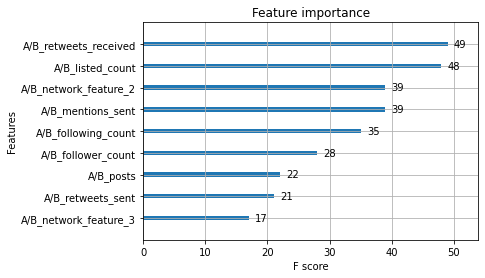

In [ ]:
# XGBoost to classify influencers 

from xgboost import XGBClassifier
from xgboost import plot_importance

neg = len(y_train)-sum(y_train==1)
pos = sum(y_train==1)

model_xg = XGBClassifier(max_depth=2, objective='binary:logistic',scale_pos_weight=neg/pos)
model_xg.fit(x_train, y_train)
y_pred=model_xg.predict(x_test)

print("Training Accuracy :", model_xg.score(x_train, y_train))
print("Testing Accuracy :", model_xg.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

plot_importance(model_xg, max_num_features=9)
pyplot.show()

#XGBoost Model results in the best testing accuracy of 78.79%

The most important features for determining influence according to XGBoost are:

*   Difference in retweets received
*  Difference in listed count
*  Difference in network feature 2 (assumed to be betweenness) 
*   Difference in mentions sent
*   Difference in following count



**Confusion matrix of best model (XGBoost) is shown below:**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[639, 190],
       [160, 661]])

Training Accuracy : 0.7766233766233767
Testing Accuracy : 0.7757575757575758
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       829
           1       0.77      0.79      0.78       821

    accuracy                           0.78      1650
   macro avg       0.78      0.78      0.78      1650
weighted avg       0.78      0.78      0.78      1650

0.7758110750812874


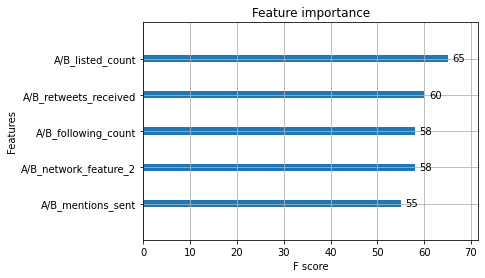

In [ ]:
# select 5 most important features to attempt to improve XGBoost

cols = ['A/B_retweets_received','A/B_listed_count','A/B_network_feature_2','A/B_mentions_sent','A/B_following_count']
x_train4 = x_train[cols]
x_test4 = x_test[cols]

neg = len(y_train)-sum(y_train==1)
pos = sum(y_train==1)

model_xg = XGBClassifier(max_depth=2, objective='binary:logistic',scale_pos_weight=neg/pos)
model_xg.fit(x_train4, y_train)
y_pred=model_xg.predict(x_test4)

print("Training Accuracy :", model_xg.score(x_train4, y_train))
print("Testing Accuracy :", model_xg.score(x_test4, y_test))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

plot_importance(model_xg, max_num_features=8)
pyplot.show()
# accuracy falls slightly to 77.58% testing performance 

In [ ]:
confusion_matrix(y_test, y_pred)

array([[634, 195],
       [175, 646]])

In summary, a business could use these models and results by identifying which influencers to target for social media promotions. Based on the Logistic Reression model, they would want to target individuals on Twitter who have **high retweets sent, mentions sent, posts, betweenness, and listed count**. Based on these properties, these are people who are highly engaged on their Twitter accounts, and they send a lot of retweets to the people they are following. This also means they have a high betweenness score, as they are important to connect other users on Twitter. By selecting these types of people to promote their products, a business may reach a larger audience more quickly. 



# Part B - Financials

In [ ]:
# import libraries
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Run chosen model

In [ ]:
# XGBoost

from xgboost import XGBClassifier
from xgboost import plot_importance

neg = len(y_train)-sum(y_train==1)
pos = sum(y_train==1)

model_xg = XGBClassifier(max_depth=2, objective='binary:logistic',scale_pos_weight=neg/pos)
model_xg.fit(x_train, y_train)
y_pred=model_xg.predict(x_test)

[15:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katel\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
# generate predictions for test and train data
y_pred=model_xg.predict(x_test)

In [ ]:
# create copies of x test and x train, add columns for pred and actual
x_test_fin = x_test.copy()

x_test_fin['pred'] = y_pred
x_test_fin['actual'] = y_test

In [ ]:
# combine to get dataset of original length with prediction values (5500)
mergedDf = df.merge(x_test_fin, left_index=True, right_index=True)
mergedDf

,Choice,A_follower_count,A_following_count,A_listed_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,...,A/B_following_count,A/B_listed_count,A/B_retweets_received,A/B_mentions_sent,A/B_retweets_sent,A/B_posts,A/B_network_feature_2,A/B_network_feature_3,pred,actual
4,1,45589,862,2641,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943,...,-849.0,2460.0,33.417223,21.117111,2.213765,19.298035,78.904293,840.220036,1,1
9,0,182598,1402,3831,74.002958,23.549189,0.100503,15.953243,276.496516,8038.066202,...,103.0,-6119.0,6.692735,12.254359,-2.466766,5.019476,90.954483,2502.126428,1,0
12,1,23230,495,826,56.668293,6.373205,0.840720,9.827005,105.210638,3589.004255,...,-502.0,797.0,56.355927,1.237848,-1.191739,5.403849,-87.152998,-266.723017,1,1
14,1,2088,419,148,0.100503,0.100503,0.100503,0.100503,9.000000,254.722222,...,-4543.0,-15.0,-1.130436,-1.313598,-0.264290,-2.355552,-11.444444,-682.666667,0,1
15,1,48711,22845,932,18.578901,0.100503,0.100503,0.100503,80.343348,4431.682403,...,21848.0,903.0,18.266535,-5.034855,-1.931955,-4.322652,-112.020289,575.955131,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5482,0,1140,927,69,0.100503,0.341936,0.100503,0.341936,14.500000,1206.500000,...,-43335.0,-1368.0,-3.264851,-0.249269,0.000000,-4.732631,-57.606383,-940.393617,0,0
5489,0,592,193,41,0.308150,1.105850,0.351840,0.351840,27.500000,528.500000,...,106.0,-322.0,-43.013315,-5.484395,-1.987293,-11.737804,18.291246,-1583.574074,0,0
5493,0,268170,2087,7870,6.383899,0.356943,0.356943,0.356943,29.914692,915.327014,...,1759.0,613.0,-311.079766,-3.224114,-1.501283,-6.127143,16.316204,-420.886596,0,0
5494,1,25360,20872,461,0.716816,1.083654,1.083654,2.532744,228.571429,9940.714286,...,19945.0,392.0,0.616313,0.741718,0.983151,2.190808,214.071429,8734.214286,1,1


In [ ]:
len(mergedDf[(mergedDf['Choice'] == mergedDf['pred'])])/len(mergedDf)

0.7745454545454545

### Profit, No Analytics

In [ ]:
conditions = [(mergedDf['Choice'] == 1),(mergedDf['Choice'] == 0)]

# create a list of the values we want to assign for each condition
values = [(0.0001*10*mergedDf['A_follower_count'])-10,(0.0001*10*mergedDf['B_follower_count'])-10]

# create a new column and use np.select to assign values to it using our lists as arguments
mergedDf['profit_no_analytics'] = np.select(conditions, values)

import locale
locale.setlocale(locale.LC_ALL, '')
total_profit_no_analytics = mergedDf['profit_no_analytics'].sum()
print(locale.currency(total_profit_no_analytics, grouping=True))

$1,516,770.70


### Profit, Perfect Analytics

In [ ]:
conditions = [(mergedDf['Choice'] == 1),(mergedDf['Choice'] == 0)]

# create a list of the values we want to assign for each condition
values = [(0.00015*10*mergedDf['A_follower_count'])-10,(0.00015*10*mergedDf['B_follower_count'])-10]

# create a new column and use np.select to assign values to it using our lists as arguments
mergedDf['profit_perfect_analytics'] = np.select(conditions, values)

import locale
locale.setlocale(locale.LC_ALL, '')
total_profit_perfect_analytics = mergedDf['profit_perfect_analytics'].sum()
print(locale.currency(total_profit_perfect_analytics, grouping=True))

$2,283,406.05


### Profit, Analytics

In [ ]:
mergedDf['accurate_pred'] = np.where(mergedDf['pred'] == mergedDf['actual'], 1, 0)
mergedAccurate = mergedDf[mergedDf['accurate_pred'] == 1]
mergedInaccurate = mergedDf[mergedDf['accurate_pred'] == 0]

In [ ]:
conditions = [(mergedAccurate['Choice'] == 1),(mergedAccurate['Choice'] == 0)]

# create a list of the values we want to assign for each condition
values = [(0.00015*10*mergedAccurate['A_follower_count']),(0.00015*10*mergedAccurate['B_follower_count'])]

# create a new column and use np.select to assign values to it using our lists as arguments
mergedAccurate['profit_analytics'] = np.select(conditions, values)

lost_money_analytics = len(mergedInaccurate)*10 

<ipython-input-22-ef7e7a435255>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedAccurate['profit_analytics'] = np.select(conditions, values)


In [ ]:
import locale
locale.setlocale(locale.LC_ALL, '')
total_profit_analytics = mergedAccurate['profit_analytics'].sum()-(len(mergedDf)*10)
print(locale.currency(total_profit_analytics, grouping=True))

$2,065,862.51


## Financial Value (Solution)
### Note: Rows used for analysis = 1650 (30% of original dataset)

What is the lift in expected net profit from using your analytic model (versus not using analytics)?

In [ ]:
lift1 = (total_profit_analytics - total_profit_no_analytics)/total_profit_no_analytics
print("The lift in expected net profit is {}%".format(round(lift1*100,2)))

The lift in expected net profit is 36.2%


What is the lift in net profit from using a perfect analytic model (versus not using analytics)?

In [ ]:
lift2 = (total_profit_perfect_analytics - total_profit_no_analytics)/total_profit_no_analytics
print("The lift in expected net profit is {}%".format(round(lift2*100,2)))

The lift in expected net profit is 50.54%


# Part 2 - Twitter Data

### Write a script to collect Tweets

In [ ]:
# Download a file from Google Drive using FILE_ID

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive tweepy
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from google.colab import files
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: 1rhnzJ8CD9Amdz5OMi8s4kqT5b00jY5k4
# Visit https://help.meiro.io/en/articles/2245027-where-can-i-find-the-file-id-on-google-drive
# for more details on getting the FILE ID.

def download_file(file_id, file_name):
    '''
    file_id: Make sure that you can access this file from your account or else, this will not run
    file_name: Name of the file by which you want to save
    '''
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_name)
    print('Downloaded file with ID {} and name {}'.format(file_id, file_name))

In [ ]:
if not os.path.isfile('secrets.txt'):
    download_file('1zotgAOC4jA0wVOC8MkwYpNhNO3gjnW9M', 'secrets.txt')

Downloaded file with ID 1zotgAOC4jA0wVOC8MkwYpNhNO3gjnW9M and name secrets.txt


In [ ]:
# You can store secrets in a file or in the form of environment variables during production.
# NEVER store keys directly on notebook.

with open('secrets.txt', 'r') as file:
    data = file.read().split('\n')

import tweepy 
import pandas as pd

consumer_key = data[0]
consumer_secret = data[1]
access_key = data[2]
access_secret = data[3]

In [ ]:
def get_query_tweets(query, num=0):
    from google.colab import drive

    num = 3000 if num > 3000 else num
    max_num_per_call = 100

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []    
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    curr_count = max_num_per_call if num > max_num_per_call else num
    num -= curr_count

    new_tweets = api.search(q=query, count=curr_count, until = '2021-02-07')

    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    print(f"{len(alltweets)} tweets downloaded so far")

    #keep grabbing tweets until there are no tweets left to grab
    while num > 0:
        print(f"Getting tweets before {oldest}")
        
        curr_count = max_num_per_call if num > max_num_per_call else num

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.search(q=query, count=curr_count, max_id=oldest)

        num -= curr_count
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv    
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8"),tweet.user.screen_name, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.statuses_count, tweet.retweet_count, tweet.favorite_count, tweet.retweeted, tweet.in_reply_to_user_id_str, tweet.in_reply_to_screen_name] for tweet in alltweets]
    df = pd.DataFrame(outtweets, columns=["id", "created_at", "text", "screen_name", "verified_user", "followers_count", "friends_count", "statuses_count", "retweet_count", "favorite_count", "retweeted", "in_reply_to_user_id", "in_reply_to_screen_name"])
    
    drive.mount('/drive')

    df.to_csv(f"/drive/My Drive/query_{query}.csv", index=False)
    print(df.head())

In [ ]:
# pass in the search query
get_query_tweets("gamestop game stop", 300)

92 tweets downloaded so far
Getting tweets before 1357871440394133503
189 tweets downloaded so far
Getting tweets before 1357622171733028863
289 tweets downloaded so far
Mounted at /drive
                    id  ... in_reply_to_screen_name
0  1358200729069121540  ...                    None
1  1358198745872138242  ...                    None
2  1358197204301844486  ...                    None
3  1358196271194902528  ...                    None
4  1358185387500449798  ...              StrahdZaro

[5 rows x 13 columns]


## Tweet Parser

In [ ]:
import io
import os 
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from google.colab import files
uploaded = files.upload()

Saving query_gamestop GME gme AMC.csv to query_gamestop GME gme AMC (1).csv


In [ ]:
tweets = pd.read_csv(io.BytesIO(uploaded['query_gamestop GME gme AMC.csv']))

In [ ]:
tweets

,id,created_at,text,screen_name,verified_user,followers_count,friends_count,statuses_count,retweet_count,favorite_count,retweeted,in_reply_to_user_id,in_reply_to_screen_name
0,1.354830e+18,1/28/21 16:43,b'Same people who invested in game stop are th...,LandoPSD,False,506,465,5439,0,4,False,NaN,NaN
1,1.354830e+18,1/28/21 16:43,b'@kenzybell4 @rhonda_ @GameStop I just though...,kimmb24,False,1061,1519,8301,0,1,False,1.000000e+18,kenzybell4
2,1.354830e+18,1/28/21 16:43,b'RT @DanPriceSeattle: *Stock market hits reco...,caseyproo,False,177,376,11157,17470,0,False,NaN,NaN
3,1.354830e+18,1/28/21 16:43,b'I have been reading a lot of Gamestop analys...,karenkho,False,44282,4567,31983,8,29,False,NaN,NaN
4,1.354830e+18,1/28/21 16:43,b'RT @DanPriceSeattle: *Stock market hits reco...,RyanRow1and,False,19,76,280,17470,0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,1.355629e+18,1/30/21 21:29,b'RT @StaffordCook2: HOLD THE FUCKING LINE!!!!...,Christi89558034,False,25,44,718,2,0,False,NaN,NaN
10725,1.355629e+18,1/30/21 21:30,b'RT @charliebilello: January...\nBlockbuster ...,jilm,False,2951,267,47288,370,0,False,NaN,NaN
10726,1.355630e+18,1/30/21 21:31,"b""RT @Paddy_Stash: I'd personally like to than...",CoinArchipelago,False,2,25,38,1,0,False,NaN,NaN
10727,1.355630e+18,1/30/21 21:32,b'RT @PennyPumpChat: Releasing our next penny ...,DSouza4Prison,False,16,83,2217,1,0,False,NaN,NaN


In [ ]:
def get_rt_names(tweets):
    
    import re

    def get_names(tweet):
        """
        Regular expression logic --- '^@.*': '^' - looks for the string starting with '@'
                                          '.' - any character
                                          '*' - repeating zero or more times
                                          Thus it looks for all the strings starting with '@'
                                 --- '[^\w]': '[]' : represents a character class
                                               '\w' : all alpha numeric characters including underscores
                                               '^': when used inside the character class it is a negation
                                        Thus it looks for all the non alpha numeric characters in a string.
        :param tweet: a row in the data frame of tweets.
        :return: a list of screen names mentioned in the tweet-text.
        """
        pattern = re.compile('^@.*')
        text = tweet['text']
        text_tokens = str(text).split()
        screen_name = tweet['screen_name']
        matches = []
        for tok in text_tokens:
            match_name = pattern.match(tok)
            if (match_name):
                rt_name = match_name.group()
                rt_name = re.sub('[^\w]', "", rt_name)
                matches.append(rt_name)
        if not matches:
            matches.append(screen_name)
        return matches

    if 'screen_name' in tweets.columns:
        if 'text' in tweets.columns:
            tweets['rt_name'] = tweets.apply(get_names, axis=1)
        else:
            print("please check for the column names")
            print(" 'text': column name for the tweet text is missing")
            print(" you might check for extra white spaces as well")
    else:
        print("please check for the column names")
        print(" 'screen_name': column name for the twitter profle name is missing")
        print(" you might check for extra white spaces as well")
    tweeters = tweets[[ 'rt_name', 'screen_name']]
    return tweeters



def construct_edges(tweeters):
    """
    :param tweeters: a datafrmae of twitter handles
    :return: A dataframe of edges with 'handles of retweeted and reply/mentions' as first column
    and the twitter of handle of the tweeted person as the second column.
    """
    network_edges = []
    for idx, row in tweeters.iterrows():
        for name in list(np.array(row.rt_name).flat):
            network_edges.append({'rt_name': row[' screen_name'], ' screen_name': name })
    network_edges = pd.DataFrame(network_edges)
    return network_edges

In [ ]:
from datetime import datetime
from google.colab import drive
import numpy as np

screen_name_list = []
rt_name_list = []
tweeters = get_rt_names(tweets)

for row in range(0,len(tweeters['screen_name'])):
  screen_name = tweeters['screen_name'][row]
  for retweet in tweeters['rt_name'][row]:
    screen_name_list.append(screen_name)
    rt_name_list.append(retweet) 

network_edges = pd.DataFrame()
network_edges['screen_name'] = screen_name_list
network_edges['rt_name'] = rt_name_list

network_edges['content_type'] = np.where(network_edges['screen_name']== network_edges['rt_name'], 'Tweet', 'Retweet')

drive.mount('/drive')
network_edges.to_csv(f"/drive/My Drive/edges_output.csv", index=False)
print(network_edges[:20])
print(len(network_edges))

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
        screen_name          rt_name content_type
0          LandoPSD         LandoPSD        Tweet
1           kimmb24          rhonda_      Retweet
2           kimmb24         GameStop      Retweet
3         caseyproo  DanPriceSeattle      Retweet
4          karenkho       ranjanxroy      Retweet
5          karenkho      ReadMargins      Retweet
6       RyanRow1and  DanPriceSeattle      Retweet
7       _eleanorina       Kantrowitz      Retweet
8       _eleanorina       ranjanxroy      Retweet
9     BrennanReilly  DanPriceSeattle      Retweet
10  tweetingnonstop  tweetingnonstop        Tweet
11        isaak_ben         edrormba      Retweet
12        isaak_ben            Yahoo      Retweet
13          C8ntral    Psychopompian      Retweet
14     WSBHitZnWinZ  DanPriceSeattle      Retweet
15       EvolveFiRE  DanPriceSeattle      Retweet
16   suraj_singhind   wallstreetbets 

## Network Analysis - Calculating Degree, Betweenness, Closeness of each node

In [ ]:
import networkx as nx

In [ ]:
import io
import os 
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from google.colab import files
uploaded = files.upload()

Saving edges_output_all_data_final.csv to edges_output_all_data_final.csv


In [ ]:
edges_df = pd.read_csv(io.BytesIO(uploaded['edges_output_all_data_final.csv']))

In [ ]:
edges_df

,Source,Target,Type
0,LandoPSD,LandoPSD,Tweet
1,kimmb24,rhonda_,Retweet
2,kimmb24,GameStop,Retweet
3,caseyproo,DanPriceSeattle,Retweet
4,karenkho,ranjanxroy,Retweet
...,...,...,...
11944,CoinArchipelago,DNC,Retweet
11945,CoinArchipelago,TheDemocrats,Retweet
11946,DSouza4Prison,PennyPumpChat,Retweet
11947,JohanTrevino,NewFoundVoice,Retweet


In [ ]:
Graph = nx.from_pandas_edgelist(edges_df,source='Source',target='Target', edge_attr=None, create_using=nx.DiGraph())

In [ ]:
in_degree = pd.DataFrame.from_dict(nx.in_degree_centrality(Graph), orient="index", columns = ["in degree"])
out_degree = pd.DataFrame.from_dict(nx.out_degree_centrality(Graph), orient="index", columns = ["out degree"])
betweenness = pd.DataFrame.from_dict(nx.betweenness_centrality(Graph), orient="index", columns = ["betweenness"])
closeness = pd.DataFrame.from_dict(nx.closeness_centrality(Graph), orient="index", columns = ["closeness"])

result = pd.concat([in_degree, out_degree, betweenness, closeness], axis=1)


In [ ]:
result["in-deg+bet+clos"] = result["in degree"] + result["betweenness"] + result["closeness"]
result.sort_values("in-deg+bet+clos", ascending=False)[:25]

,in degree,out degree,betweenness,closeness,in-deg+bet+clos
DanPriceSeattle,0.143578,0.000000,0.000000e+00,0.143578,0.287156
charliebilello,0.114824,0.000095,0.000000e+00,0.114734,0.229558
YahooFinance,0.030848,0.000571,1.539403e-05,0.030981,0.061845
TheStreet,0.016186,0.000095,0.000000e+00,0.016093,0.032279
MarcGiller,0.013996,0.000095,0.000000e+00,0.013901,0.027897
RobinhoodApp,0.011330,0.000000,0.000000e+00,0.015319,0.026649
premnsikka,0.012377,0.000095,0.000000e+00,0.012282,0.024660
ruttigerrr,0.011425,0.000000,0.000000e+00,0.011425,0.022851
GameStop,0.011044,0.000000,0.000000e+00,0.011558,0.022603
BrianSozzi,0.002952,0.000190,1.359897e-07,0.017176,0.020127


## Identify Network Influencers 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = edges_df
query = tweets
calcs = result

In [ ]:
len(df)

11949

In [ ]:
len(query)

10729

In [ ]:
len(calcs)

10504

In [ ]:
calcs.head()

,in degree,out degree,betweenness,closeness,in-deg+bet+clos
LandoPSD,0.000095,0.000095,0.0,0.000000,0.000095
kimmb24,0.000000,0.000190,0.0,0.000000,0.000000
rhonda_,0.000095,0.000000,0.0,0.000095,0.000190
GameStop,0.011044,0.000000,0.0,0.011558,0.022603
caseyproo,0.000000,0.000095,0.0,0.000000,0.000000


In [ ]:
query.head()

,id,created_at,text,screen_name,verified_user,followers_count,friends_count,statuses_count,retweet_count,favorite_count,retweeted,in_reply_to_user_id,in_reply_to_screen_name,rt_name
0,1.354830e+18,1/28/21 16:43,b'Same people who invested in game stop are th...,LandoPSD,False,506,465,5439,0,4,False,NaN,NaN,[LandoPSD]
1,1.354830e+18,1/28/21 16:43,b'@kenzybell4 @rhonda_ @GameStop I just though...,kimmb24,False,1061,1519,8301,0,1,False,1.000000e+18,kenzybell4,"[rhonda_, GameStop]"
2,1.354830e+18,1/28/21 16:43,b'RT @DanPriceSeattle: *Stock market hits reco...,caseyproo,False,177,376,11157,17470,0,False,NaN,NaN,[DanPriceSeattle]
3,1.354830e+18,1/28/21 16:43,b'I have been reading a lot of Gamestop analys...,karenkho,False,44282,4567,31983,8,29,False,NaN,NaN,"[ranjanxroy, ReadMargins]"
4,1.354830e+18,1/28/21 16:43,b'RT @DanPriceSeattle: *Stock market hits reco...,RyanRow1and,False,19,76,280,17470,0,False,NaN,NaN,[DanPriceSeattle]


In [ ]:
df.head()

,Source,Target,Type
0,LandoPSD,LandoPSD,Tweet
1,kimmb24,rhonda_,Retweet
2,kimmb24,GameStop,Retweet
3,caseyproo,DanPriceSeattle,Retweet
4,karenkho,ranjanxroy,Retweet


**We merged the degree, betweenness, and closeness scores on the query of the original Tweets to get the retweets and following information from the Twitter API.**

In [ ]:
combined = query.merge(calcs, left_on = 'screen_name', right_index=True)

In [ ]:
combined_dropped = combined.drop(labels=['id', 'created_at', 'verified_user', 'friends_count', 'favorite_count','retweeted','in_reply_to_user_id','in_reply_to_screen_name','in degree','out degree', 'betweenness','closeness'],
             axis=1)

In [ ]:
combined_dropped.head()

,text,screen_name,followers_count,statuses_count,retweet_count,rt_name,in-deg+bet+clos
0,b'Same people who invested in game stop are th...,LandoPSD,506,5439,0,[LandoPSD],0.000095
1,b'@kenzybell4 @rhonda_ @GameStop I just though...,kimmb24,1061,8301,0,"[rhonda_, GameStop]",0.000000
2,b'RT @DanPriceSeattle: *Stock market hits reco...,caseyproo,177,11157,17470,[DanPriceSeattle],0.000000
3,b'I have been reading a lot of Gamestop analys...,karenkho,44282,31983,8,"[ranjanxroy, ReadMargins]",0.001555
4,b'RT @DanPriceSeattle: *Stock market hits reco...,RyanRow1and,19,280,17470,[DanPriceSeattle],0.000000


**We normalized all the data before creating overall scores.**

In [ ]:
scaler = StandardScaler()
combined_dropped[['followers_count','statuses_count','retweet_count','in-deg+bet+clos']] = scaler.fit_transform(combined_dropped[['followers_count','statuses_count','retweet_count','in-deg+bet+clos']])


In [ ]:
combined_dropped.head()

,text,screen_name,followers_count,statuses_count,retweet_count,rt_name,in-deg+bet+clos
0,b'Same people who invested in game stop are th...,LandoPSD,-0.057976,-0.265547,-0.431391,[LandoPSD],-0.054719
1,b'@kenzybell4 @rhonda_ @GameStop I just though...,kimmb24,-0.054184,-0.244141,-0.431391,"[rhonda_, GameStop]",-0.078030
2,b'RT @DanPriceSeattle: *Stock market hits reco...,caseyproo,-0.060224,-0.222779,2.469499,[DanPriceSeattle],-0.078030
3,b'I have been reading a lot of Gamestop analys...,karenkho,0.241143,-0.067009,-0.430063,"[ranjanxroy, ReadMargins]",0.302706
4,b'RT @DanPriceSeattle: *Stock market hits reco...,RyanRow1and,-0.061304,-0.304134,2.469499,[DanPriceSeattle],-0.078030


**Based on the information we had available and the data given in the Twitter API output, we used followers_count, statuses_count, retweet_count, and our scaled in-degree+betweenness+closeness to build an influencer score. These weights were based on the relative feature importances in the XGBoost model with all predictors. We added together the importances of in-degree, betweeness, and closeness to get a weight of 42%. Retweet count is the second most important with a weight of 25%, followed by followers_count with a weight of 19%, and statuses count with a weight of 14%.**

In [ ]:
weights = [0.186999,0.139702,0.250465,0.422834]

np.dot(weights,combined_dropped[['followers_count','statuses_count','retweet_count','in-deg+bet+clos']].iloc[0])
combined_dropped['score'] = np.nan

In [ ]:
for val in range(len(combined_dropped)):
    combined_dropped['score'].iloc[val] = np.dot(weights,combined_dropped[['followers_count','statuses_count','retweet_count','in-deg+bet+clos']].iloc[val])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
combined_dropped.head()

,text,screen_name,followers_count,statuses_count,retweet_count,rt_name,in-deg+bet+clos,score
0,b'Same people who invested in game stop are th...,LandoPSD,-0.057976,-0.265547,-0.431391,[LandoPSD],-0.054719,-0.179125
1,b'@kenzybell4 @rhonda_ @GameStop I just though...,kimmb24,-0.054184,-0.244141,-0.431391,"[rhonda_, GameStop]",-0.078030,-0.185281
2,b'RT @DanPriceSeattle: *Stock market hits reco...,caseyproo,-0.060224,-0.222779,2.469499,[DanPriceSeattle],-0.078030,0.543145
3,b'I have been reading a lot of Gamestop analys...,karenkho,0.241143,-0.067009,-0.430063,"[ranjanxroy, ReadMargins]",0.302706,0.056011
4,b'RT @DanPriceSeattle: *Stock market hits reco...,RyanRow1and,-0.061304,-0.304134,2.469499,[DanPriceSeattle],-0.078030,0.531578


In [ ]:
names_scores = combined_dropped[["screen_name","score"]].sort_values(by="score", ascending = False)

**Because some people are retweeted multiple times and can tweet multiple times in our dataset, we ended up with duplicate scores for certain users. To solve this, we simply took the highest score value for each user to rank influencers.**

In [ ]:
names_scores

,screen_name,score
5630,charliebilello,23.912842
5778,charliebilello,23.885268
4265,guardian,12.849746
9505,Estadao,9.254956
424,YahooFinance,7.819345
...,...,...
5324,FOOtoriousBIG,-0.195308
8333,Sebastianjanis5,-0.195309
7763,JB99663213,-0.195309
7625,stealDonaldDump,-0.195310


In [ ]:
names_scores_no_dup = names_scores.drop_duplicates(subset=["screen_name"], keep="first")

##List of Top 25 Influencers

In [ ]:
names_scores_no_dup[:25]

,screen_name,score
5630,charliebilello,23.912842
4265,guardian,12.849746
9505,Estadao,9.254956
424,YahooFinance,7.819345
6620,businessinsider,4.991574
4155,BFMTV,4.401204
5893,TheStreet,4.312203
974,FortuneMagazine,3.210872
4619,engadget,3.199096
4240,guardiantech,3.115835


Charlie Bilello, CEO of Compound Capital Advisors, is identified as the top influencer in the Gamestop/GME twitter conversation, with a score *nearly double* the next influencer. Many news organizations round out the top 25 influencers, including The Guardian, Estadao (a Brazilian news account), Yahoo and Yahoo Finance, Business Insider, and ReutersBiz. Other influencers include actor King Bach and a spam account richeater420 made their ways into the influencers in this dataset collected over Jan 29-30 2021. 